In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
# import torch

In [22]:
import data.constructKG as constructKG

In [24]:
data_path = '../Data'
files = ['EN-NEG20.csv', 'EN-NEG21.csv', 'EN-NEG22M.csv', 'NEG-NEG22F.csv']
# Merge all data into one dataframe
df = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv(f'{data_path}/{file}')
    df = pd.concat([df, temp_df], axis=0)

In [ ]:
df.shape

In [25]:
# Variables we care about
vars = ['student.age', 'student.gender_desc', 'student_originSchool.isITESM',
        'student.lastTerm_gpa_program', 'student.term_gpa_program', 
        'student.semester_desc', 'student.id','subject.longName', 
        'subject.type_desc','student.isConditioned','group.isVirtual', 'group.isEnglishLanguage',
        'group.isLIFE', 'student_grades.final_numeric_afterAdjustment','group.duration_weeks',
        'competence.desc', 'subcompetence.level_assigned', 'subcompetence.level_required',
]

gpa_df = df[vars]
# If last term gpa is missing, fill it with term gpa
gpa_df['student.lastTerm_gpa_program'] = gpa_df['student.lastTerm_gpa_program'].fillna(gpa_df['student.term_gpa_program'])
# Drop rows with missing values
gpa_df = gpa_df.dropna()

C:\Users\tafoy\AppData\Local\Temp\ipykernel_6084\2697802633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpa_df['student.lastTerm_gpa_program'] = gpa_df['student.lastTerm_gpa_program'].fillna(gpa_df['student.term_gpa_program'])


In [26]:
graph_constructor = constructKG.GraphConstructor(KG_path='KG_64')

In [27]:
embedding_dim = 64
embeddings = graph_constructor.get_embeddings_from_df(gpa_df, node2vec_epochs=50, dim=embedding_dim)

Building graph for semester Fifth Semester...


Semester Fifth Semester: 100%|██████████| 240/240 [00:00<00:00, 23130.88it/s]

Creating graph for semester Fifth Semester...


Reading graph:   0%|          | 0/240 [00:00<?, ?it/s]

Training Node2Vec for semester Fifth Semester...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Building graph for semester First Semester...


Semester First Semester: 100%|██████████| 401777/401777 [00:14<00:00, 28441.72it/s]


Creating graph for semester First Semester...


Reading graph:   0%|          | 0/401777 [00:00<?, ?it/s]

Training Node2Vec for semester First Semester...


c:\Users\tafoy\anaconda3\Lib\site-packages\fastnode2vec\graph.py:176: RuntimeWarning: invalid value encountered in divide
  data = edges.data / edges.sum(axis=1).A1.repeat(np.diff(self.indptr))


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Building graph for semester Fourth Semester...


Semester Fourth Semester: 100%|██████████| 30471/30471 [00:01<00:00, 28699.89it/s]


Creating graph for semester Fourth Semester...


Reading graph:   0%|          | 0/30471 [00:00<?, ?it/s]

Training Node2Vec for semester Fourth Semester...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Building graph for semester No information...


Semester No information: 100%|██████████| 2930/2930 [00:00<00:00, 30075.08it/s]

Creating graph for semester No information...


Reading graph:   0%|          | 0/2930 [00:00<?, ?it/s]

Training Node2Vec for semester No information...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Building graph for semester Second Semester...


Semester Second Semester: 100%|██████████| 1718746/1718746 [01:00<00:00, 28460.86it/s]


Creating graph for semester Second Semester...


Reading graph:   0%|          | 0/1718746 [00:00<?, ?it/s]

Training Node2Vec for semester Second Semester...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Building graph for semester Third Semester...


Semester Third Semester: 100%|██████████| 147713/147713 [00:26<00:00, 5538.79it/s]


Creating graph for semester Third Semester...


Reading graph:   0%|          | 0/147713 [00:00<?, ?it/s]

Training Node2Vec for semester Third Semester...


Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# embedding_path = './KG_gc/student_embeddings.pkl'
# embeddings = pickle.load(open(embedding_path, 'rb'))

In [ ]:
import numpy as np

# Define the desired column order
desired_columns = [
    'student.id',
    'achieved_First Semester', 'not_achieved_First Semester',
    'achieved_Second Semester', 'not_achieved_Second Semester',
    'achieved_Third Semester', 'not_achieved_Third Semester',
    'achieved_Fourth Semester', 'not_achieved_Fourth Semester',
    'achieved_Fifth Semester', 'not_achieved_Fifth Semester',
    'achieved_Sixth Semester', 'not_achieved_Sixth Semester',
    'achieved_Seventh Semester', 'not_achieved_Seventh Semester',
    'achieved_Eighth Semester', 'not_achieved_Eighth Semester',
    'achieved_No information', 'not_achieved_No information'
]

# Initialize the DataFrame with the desired column order
student_df = pd.DataFrame(columns=desired_columns)

# Populate the 'student.id' column with unique student IDs
student_df['student.id'] = gpa_df['student.id'].unique()  # Ensure unique student IDs

# Iterate over semesters to populate achievement columns
for semester in gpa_df['student.semester_desc'].unique():
    achieved_col = f'achieved_{semester}'
    not_achieved_col = f'not_achieved_{semester}'
    
    # Initialize columns with NaN
    student_df[achieved_col] = np.nan
    student_df[not_achieved_col] = np.nan
    
    # Filter data for the current semester
    semester_data = gpa_df[gpa_df['student.semester_desc'] == semester]
    for student_id in student_df['student.id']:
        student_rows = semester_data[semester_data['student.id'] == student_id]
        
        if not student_rows.empty:
            # Count achieved and not achieved subcompetencies
            achieved_count = (student_rows['subcompetence.level_assigned'] == 'Observed').sum()
            not_achieved_count = (student_rows['subcompetence.level_assigned'] == 'Not observed').sum()
            
            # Update the corresponding columns
            student_df.loc[student_df['student.id'] == student_id, achieved_col] = achieved_count
            student_df.loc[student_df['student.id'] == student_id, not_achieved_col] = not_achieved_count

# Save the final DataFrame
student_df.to_csv('student_subcompetence_analysis_with_nan.csv', index=False)
print("Final DataFrame saved as 'student_subcompetence_analysis_with_nan.csv'.")


In [ ]:
# Load the CSV file for analysis
analysis_df = pd.read_csv('student_subcompetence_analysis_with_nan.csv')

# Select only the columns for "not achieved" subcompetencies
not_achieved_columns = [col for col in analysis_df.columns if col.startswith("not_achieved_")]

# Combine all "not achieved" values into a single series for histogram analysis
not_achieved_data = analysis_df[not_achieved_columns].stack().dropna()

# Plot a histogram of the combined data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(not_achieved_data, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Not Achieved Subcompetencies Across Semesters")
plt.xlabel("Number of Not Achieved Subcompetencies")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# New bins to reduce imbalance
bins = [0, 1, 3, np.inf]
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']

# Apply updated binning
not_achieved_data_binned = pd.cut(not_achieved_data, bins=bins, labels=labels, right=False)

# Count the number of students in each category
category_counts = not_achieved_data_binned.value_counts().sort_index()

# Plot the updated bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Updated Distribution of Not Achieved Subcompetencies by Category")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


In [28]:
import numpy as np

semester = 'First Semester'
sem_embeddings = embeddings[semester]

# Create lists for embeddings and labels
embedding_list = []
labels = []

for node_label, embedding in sem_embeddings.items():
    embedding_list.append(embedding)
    labels.append(node_label)

embedding_array = np.array(embedding_list)
student_ids = [label.replace('student_', '') for label in labels]

In [29]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embedding_array)

c:\Users\tafoy\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

student_categories_df = pd.read_csv('student_subcompetence_analysis_with_nan.csv')

print(student_categories_df.columns)

Index(['student.id', 'achieved_First Semester', 'not_achieved_First Semester',
       'achieved_Second Semester', 'not_achieved_Second Semester',
       'achieved_Third Semester', 'not_achieved_Third Semester',
       'achieved_Fourth Semester', 'not_achieved_Fourth Semester',
       'achieved_Fifth Semester', 'not_achieved_Fifth Semester',
       'achieved_Sixth Semester', 'not_achieved_Sixth Semester',
       'achieved_Seventh Semester', 'not_achieved_Seventh Semester',
       'achieved_Eighth Semester', 'not_achieved_Eighth Semester',
       'achieved_No information', 'not_achieved_No information'],
      dtype='object')


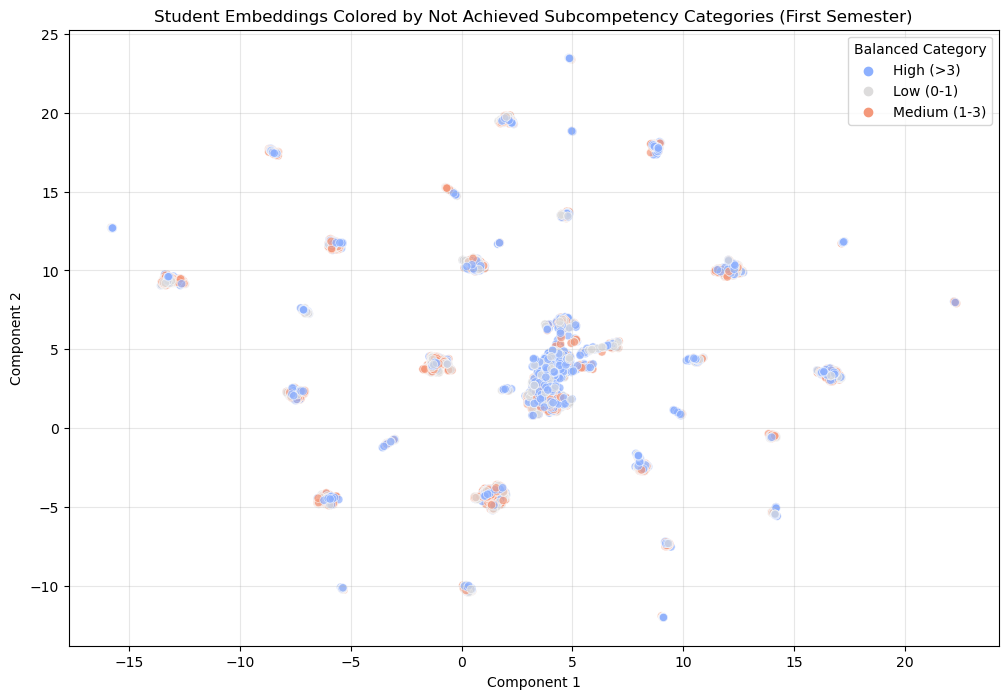

In [31]:
# Select the "not achieved" column for the specified semester
not_achieved_column = f'not_achieved_{semester}'

# Ensure the column exists
if not_achieved_column not in student_categories_df.columns:
    raise ValueError(f"The column '{not_achieved_column}' does not exist in the data.")

# Map the "not achieved" counts to balanced categories
bins = [0, 1, 3, np.inf]
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']
student_categories_df['balanced_category'] = pd.cut(
    student_categories_df[not_achieved_column],
    bins=bins,
    labels=labels,
    right=False
)

# Create a dictionary mapping student IDs to balanced categories
balanced_category_dict = dict(zip(student_categories_df['student.id'].astype(str), student_categories_df['balanced_category']))

# Map the categories to the embeddings
not_achieved_categories = [balanced_category_dict.get(student_id, 'Unknown') for student_id in student_ids]

# Plot the embeddings
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=not_achieved_categories,
    palette='coolwarm',
    alpha=0.7
)

# Customize the plot
plt.title(f'Student Embeddings Colored by Not Achieved Subcompetency Categories ({semester})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Balanced Category', loc='upper right')
plt.grid(alpha=0.3)
plt.show()

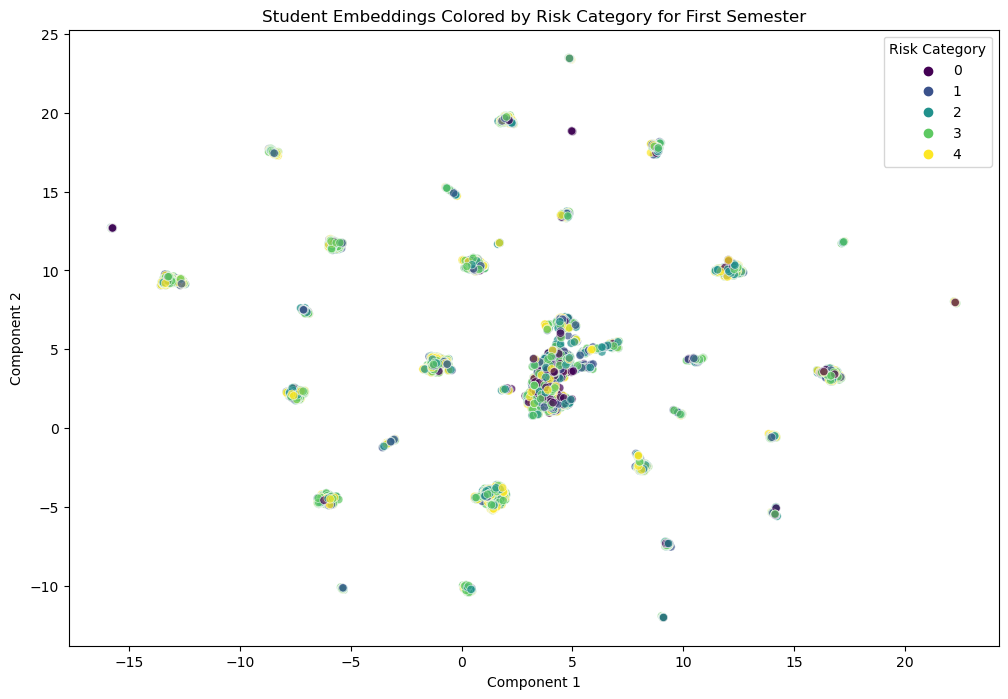

In [32]:
student_info_df = gpa_df[['student.id', 'student.term_gpa_program']]
student_info_df = student_info_df.drop_duplicates(subset=['student.id'])
student_info_df['risk_category'] = student_info_df['student.term_gpa_program'].apply(
    lambda x: 0 if x < 75 else
              1 if x < 85 else
              2 if x < 90 else
              3 if x < 95 else 4
)

risk_category_dict = dict(zip(student_info_df['student.id'].astype(str), student_info_df['risk_category']))

# Get risk categories for the embeddings
risk_categories = [risk_category_dict.get(student_id, -1) for student_id in student_ids]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=risk_categories,
    palette='viridis',
    alpha=0.7
)

plt.title(f'Student Embeddings Colored by Risk Category for {semester}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Risk Category')
plt.show()


In [33]:
# 3D umap
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(embedding_array)

from mpl_toolkits.mplot3d import Axes3D

c:\Users\tafoy\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


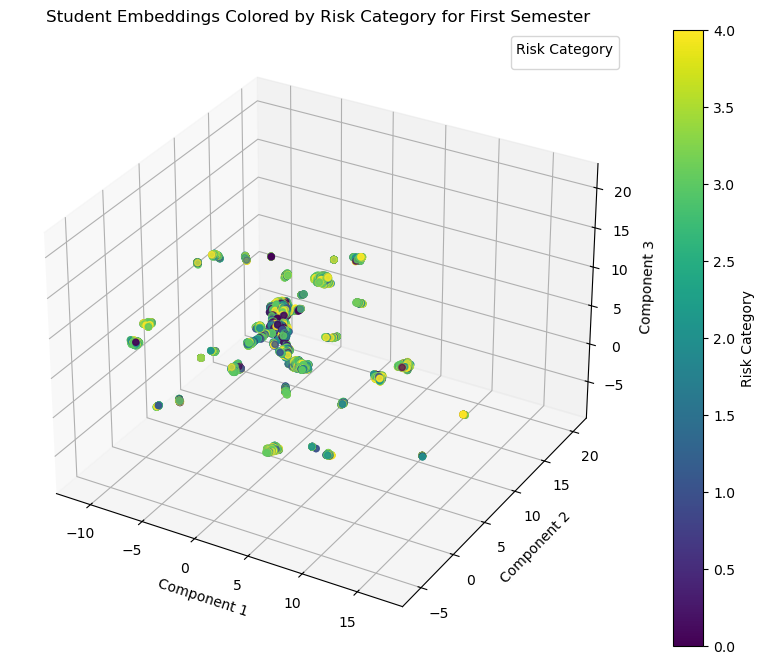

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

student_info_df = gpa_df[['student.id', 'student.term_gpa_program']]
student_info_df = student_info_df.drop_duplicates(subset=['student.id'])
student_info_df['risk_category'] = student_info_df['student.term_gpa_program'].apply(
    lambda x: 0 if x < 75 else
              1 if x < 85 else
              2 if x < 90 else
              3 if x < 95 else 4
)

risk_category_dict = dict(zip(student_info_df['student.id'].astype(str), student_info_df['risk_category']))

risk_categories = [risk_category_dict.get(student_id, -1) for student_id in student_ids]

ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=risk_categories,
    cmap='viridis',
    alpha=0.7
)

#colorbar
cbar = plt.colorbar(ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=risk_categories, cmap='viridis'))
cbar.set_label('Risk Category')

ax.set_title(f'Student Embeddings Colored by Risk Category for {semester}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Risk Category')
plt.show()


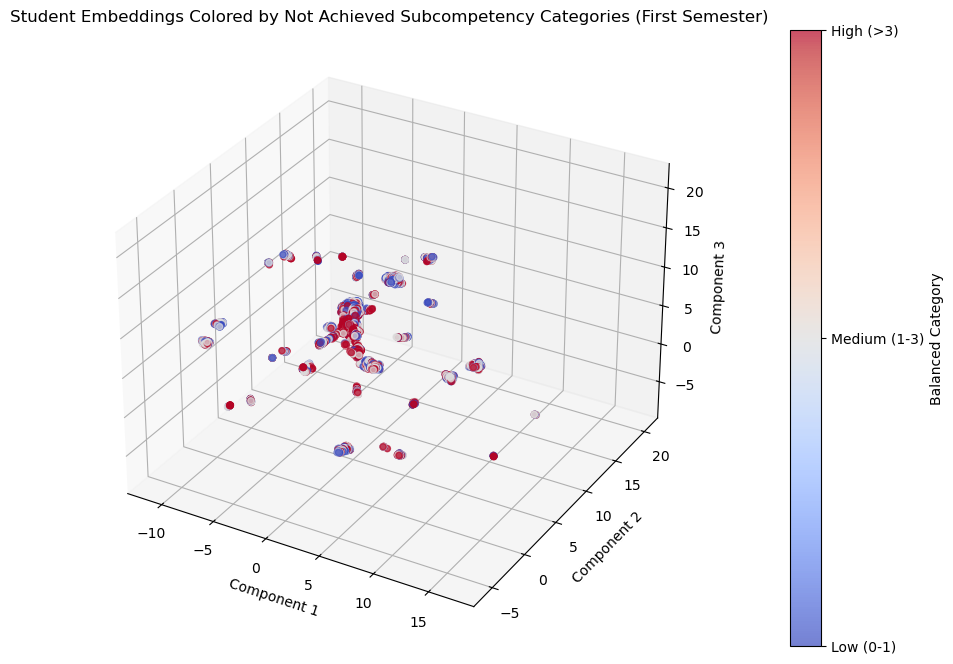

In [35]:
# 3D umap with not achieved subcompetencies

not_achieved_column = f'not_achieved_{semester}'
if not_achieved_column not in student_categories_df.columns:
    raise ValueError(f"The column '{not_achieved_column}' does not exist in the data.")

bins = [0, 1, 3, np.inf]
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']
student_categories_df['balanced_category'] = pd.cut(
    student_categories_df[not_achieved_column],
    bins=bins,
    labels=labels,
    right=False
)

balanced_category_dict = dict(zip(student_categories_df['student.id'].astype(str), student_categories_df['balanced_category']))
not_achieved_categories = [balanced_category_dict.get(student_id, 'Unknown') for student_id in student_ids]

# Map category labels to integers for color mapping
category_to_int = {label: idx for idx, label in enumerate(labels)}
colors = [category_to_int[cat] if cat in category_to_int else -1 for cat in not_achieved_categories]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=colors,
    cmap='coolwarm',
    alpha=0.7
)

# Add a color bar for the categories
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(labels)
colorbar.set_label('Balanced Category')

# Set plot labels and title
ax.set_title(f'Student Embeddings Colored by Not Achieved Subcompetency Categories ({semester})')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(embedding_array)

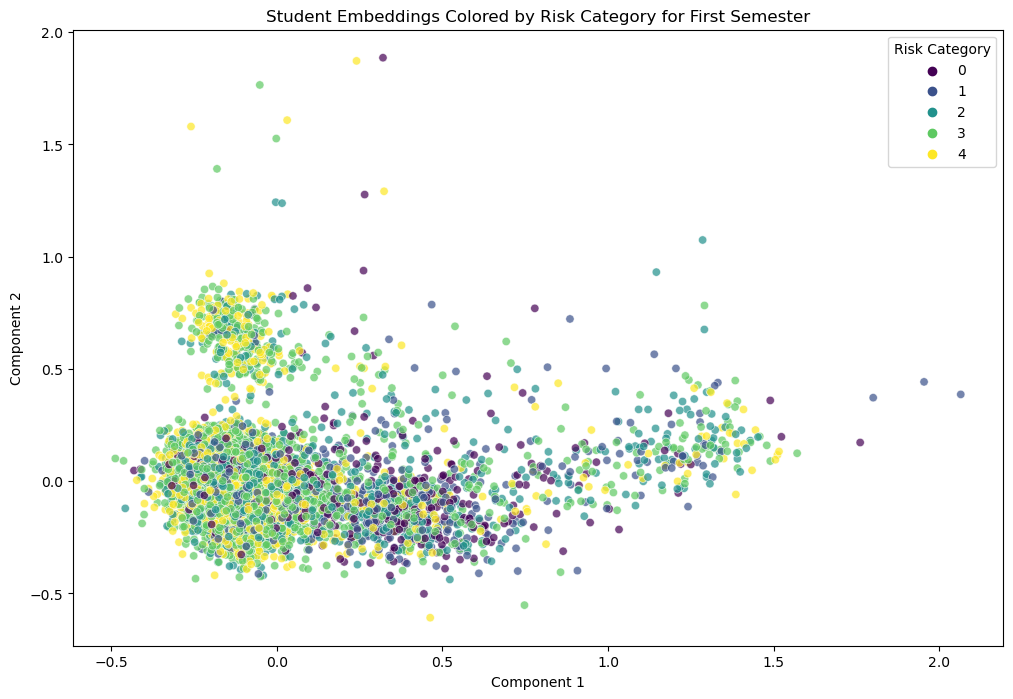

In [37]:
student_info_df = gpa_df[['student.id', 'student.term_gpa_program']]
student_info_df = student_info_df.drop_duplicates(subset=['student.id'])
student_info_df['risk_category'] = student_info_df['student.term_gpa_program'].apply(
    lambda x: 0 if x < 75 else
              1 if x < 85 else
              2 if x < 90 else
              3 if x < 95 else 4
)

risk_category_dict = dict(zip(student_info_df['student.id'].astype(str), student_info_df['risk_category']))

# Get risk categories for the embeddings
risk_categories = [risk_category_dict.get(student_id, -1) for student_id in student_ids]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=risk_categories,
    palette='viridis',
    alpha=0.7
)

plt.title(f'Student Embeddings Colored by Risk Category for {semester}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Risk Category')
plt.show()

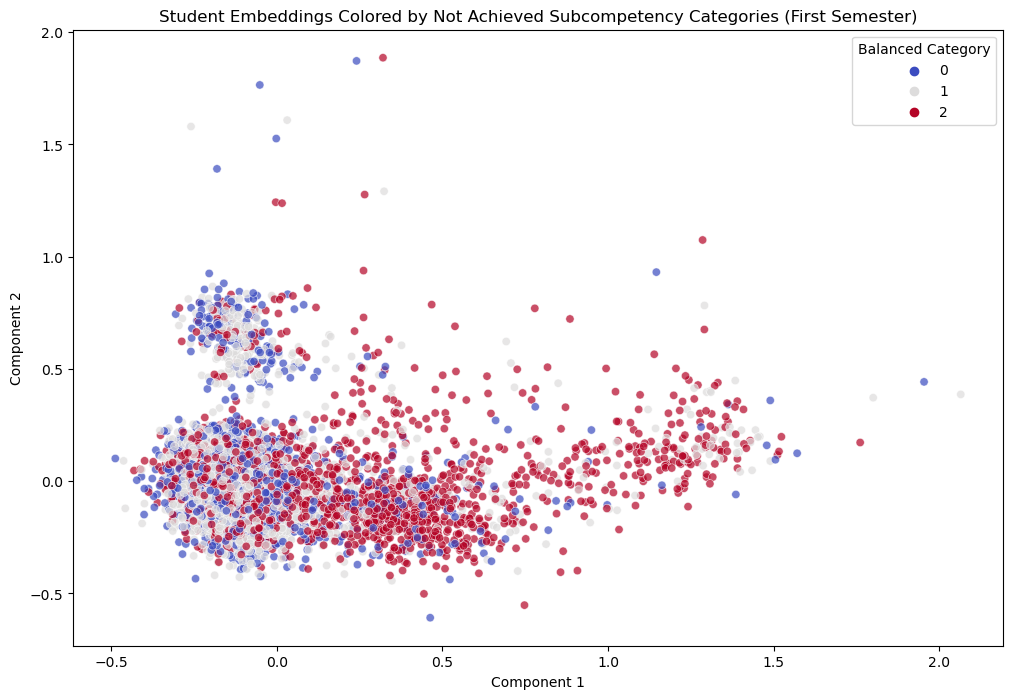

In [38]:
# 2d pca for not achieved subcompetencies

not_achieved_column = f'not_achieved_{semester}'
if not_achieved_column not in student_categories_df.columns:
    raise ValueError(f"The column '{not_achieved_column}' does not exist in the data.")

bins = [0, 1, 3, np.inf]
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']

student_categories_df['balanced_category'] = pd.cut(
    student_categories_df[not_achieved_column],
    bins=bins,
    labels=labels,
    right=False
)

balanced_category_dict = dict(zip(student_categories_df['student.id'].astype(str), student_categories_df['balanced_category']))
not_achieved_categories = [balanced_category_dict.get(student_id, 'Unknown') for student_id in student_ids]

# Map category labels to integers for color mapping
category_to_int = {label: idx for idx, label in enumerate(labels)}
colors = [category_to_int[cat] if cat in category_to_int else -1 for cat in not_achieved_categories]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=colors,
    palette='coolwarm',
    alpha=0.7
)

plt.title(f'Student Embeddings Colored by Not Achieved Subcompetency Categories ({semester})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Balanced Category')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


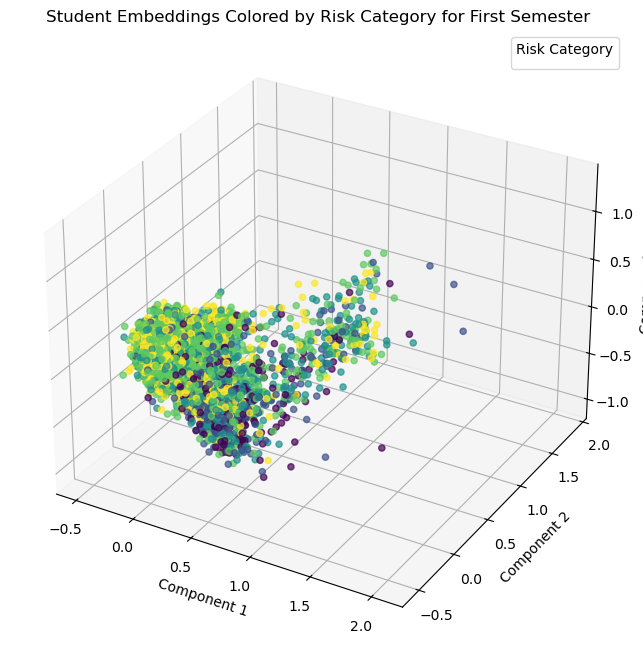

In [39]:
# 3d PCA
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(embedding_array)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

student_info_df = gpa_df[['student.id', 'student.term_gpa_program']]
student_info_df = student_info_df.drop_duplicates(subset=['student.id'])
student_info_df['risk_category'] = student_info_df['student.term_gpa_program'].apply(
    lambda x: 0 if x < 75 else
              1 if x < 85 else
              2 if x < 90 else
              3 if x < 95 else 4
)

risk_category_dict = dict(zip(student_info_df['student.id'].astype(str), student_info_df['risk_category']))

risk_categories = [risk_category_dict.get(student_id, -1) for student_id in student_ids]

ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=risk_categories,
    cmap='viridis',
    alpha=0.7,
)
    

ax.set_title(f'Student Embeddings Colored by Risk Category for {semester}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Risk Category')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Ensure "not achieved" column exists
not_achieved_column = f'not_achieved_{semester}'
if not_achieved_column not in student_categories_df.columns:
    raise ValueError(f"The column '{not_achieved_column}' does not exist in the data.")

# Discretize "not achieved" subcompetencies
bins = [0, 1, 3, np.inf]
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']
student_categories_df['balanced_category'] = pd.cut(
    student_categories_df[not_achieved_column],
    bins=bins,
    labels=labels,
    right=False
)

# Map student IDs to balanced categories
balanced_category_dict = dict(zip(student_categories_df['student.id'].astype(str), student_categories_df['balanced_category']))

# Map the balanced categories to embeddings
not_achieved_categories = [balanced_category_dict.get(student_id, 'Unknown') for student_id in student_ids]

# Handle missing categories and map them to integers for color mapping
category_to_int = {label: idx for idx, label in enumerate(labels)}
colors = [
    category_to_int[cat] if cat in category_to_int else -1  # Assign -1 for "Unknown" (if any)
    for cat in not_achieved_categories
]

# Remove unknown categories (if any)
valid_points = np.array(colors) != -1
embedding_3d_valid = embedding_3d[valid_points]
colors_valid = np.array(colors)[valid_points]

# Create a new vibrant colormap for the categories
vibrant_cmap = ListedColormap(['royalblue', 'darkorange', 'crimson'])

# Plot the 3D scatter with improved aesthetics
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding_3d_valid[:, 0],
    embedding_3d_valid[:, 1],
    embedding_3d_valid[:, 2],
    c=colors_valid,
    cmap=vibrant_cmap,
    alpha=0.9,  # Reduce transparency for better visibility
    s=50        # Increase marker size
)

# Add a discrete color bar
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(labels)
colorbar.set_label('Not Achieved Subcompetency Category')

# Set plot labels and title
ax.set_title(f'Student Embeddings Colored by Not Achieved Subcompetency Categories ({semester})', fontsize=14)
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 2', fontsize=12)
ax.set_zlabel('Component 3', fontsize=12)

# Adjust gridlines for clarity
ax.grid(alpha=0.3)

plt.show()


In [ ]:
# GPA Average per student per semester
gpa_df['student.id'] = gpa_df['student.id'].astype(str)
gpa_df['student.semester_desc'] = gpa_df['student.semester_desc'].astype(str)

student_semester_gpa = gpa_df.groupby(['student.id', 'student.semester_desc'])['student.term_gpa_program'].mean().reset_index()
student_semester_gpa = student_semester_gpa.pivot(index='student.id', columns='student.semester_desc', values='student.term_gpa_program').reset_index()
student_semester_gpa = student_semester_gpa.fillna(0)

In [ ]:
import pandas as pd
import numpy as np

# Load the original file with raw "not achieved" counts
student_df = pd.read_csv('student_subcompetence_analysis_with_nan.csv')

# Check the initial structure of the DataFrame
print("Initial DataFrame columns:")
print(student_df.columns)

# Define bins and labels for categorization
bins = [0, 1, 3, np.inf]  # Define bins for "not achieved" counts
labels = ['Low (0-1)', 'Medium (1-3)', 'High (>3)']  # Labels for categories

# Semester order to ensure alignment with the dataloader
semester_order = {
    'No information': 0,
    'First Semester': 1,
    'Second Semester': 2,
    'Third Semester': 3,
    'Fourth Semester': 4,
    'Fifth Semester': 5,
    'Sixth Semester': 6,
    'Seventh Semester': 7,
    'Eighth Semester': 8
}

# Create a new DataFrame to store only "not achieved" categories in the correct semester order
columns_to_keep = ['student.id'] + [f'not_achieved_{semester}' for semester in semester_order.keys()]
filtered_df = student_df[columns_to_keep]

# Rename "not achieved" columns to just the semester name
renamed_columns = {'not_achieved_' + semester: semester for semester in semester_order.keys()}
filtered_df = filtered_df.rename(columns=renamed_columns)

# Iterate over each renamed column and convert counts to categories
for semester in semester_order.keys():
    if semester in filtered_df.columns:
        filtered_df[semester] = pd.cut(filtered_df[semester], bins=bins, labels=labels, right=False)

# Save the updated DataFrame for later use
filtered_df.to_csv('student_subcompetence_analysis_by_semester.csv', index=False)
print("Updated DataFrame with categorized semesters saved.")

# Check the structure of the saved DataFrame
print("Filtered DataFrame columns:")
print(filtered_df.columns)


In [2]:
import pickle
embedding_path = './KG_gc/student_embeddings.pkl'
embeddings = pickle.load(open(embedding_path, 'rb'))

In [3]:
import pandas as pd
import numpy as np

In [20]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
balanced_df = pd.read_csv('balanced_student_subcompetence_analysis_by_semester.csv')

# Flatten the data to analyze class distribution per semester
flattened_data = []
for _, row in balanced_df.iterrows():
    student_id = row['student.id']
    for semester, category in row.items():
        if semester != 'student.id' and pd.notna(category):
            flattened_data.append({'student.id': student_id, 'semester': semester, 'category': category})

# Convert to DataFrame
flattened_df = pd.DataFrame(flattened_data)

# List of semesters to process (you can adjust this as needed)
semesters_to_process = ['First Semester', 'Second Semester', 'Third Semester']

# Initialize an empty list to collect balanced data
balanced_data_per_semester = []

for semester in semesters_to_process:
    semester_data = flattened_df[flattened_df['semester'] == semester]
    # Check the class counts in this semester
    class_counts = semester_data['category'].value_counts()
    min_class_count = class_counts.min()
    # Resample each class to the min_class_count
    resampled_classes = []
    for category in class_counts.index:
        class_subset = semester_data[semester_data['category'] == category]
        resampled_subset = resample(
            class_subset,
            replace=False,  # No oversampling
            n_samples=min_class_count,
            random_state=42
        )
        resampled_classes.append(resampled_subset)
    # Concatenate resampled classes
    balanced_semester_data = pd.concat(resampled_classes)
    balanced_data_per_semester.append(balanced_semester_data)

# Combine the balanced data from all semesters
balanced_flattened_df = pd.concat(balanced_data_per_semester)

# Previous class distribution, only semesters 1,2 and 3
print("Original Class Distribution per Semester:")
df123 = flattened_df[flattened_df['semester'].isin(semesters_to_process)]
print(df123.groupby('semester')['category'].value_counts())

# Check the new class distribution per semester
print("Balanced Class Distribution per Semester:")
print(balanced_flattened_df.groupby('semester')['category'].value_counts())

# Reconstruct the wide format DataFrame
final_balanced_df = balanced_flattened_df.pivot_table(
    index='student.id', columns='semester', values='category', aggfunc='first'
).reset_index()

# Save the final balanced dataset
final_balanced_df.to_csv('strictly_balanced_student_subcompetence_analysis_by_semester.csv', index=False)
print("Strictly balanced dataset saved as 'strictly_balanced_student_subcompetence_analysis_by_semester.csv'.")

Original Class Distribution per Semester:
semester         category    
First Semester   Medium (1-3)    3132
                 High (>3)       2164
                 Low (0-1)       1911
Second Semester  High (>3)       3693
                 Low (0-1)       2295
                 Medium (1-3)    2058
Third Semester   Low (0-1)       1392
                 Medium (1-3)     900
                 High (>3)        558
Name: category, dtype: int64
Balanced Class Distribution per Semester:
semester         category    
First Semester   High (>3)       1911
                 Low (0-1)       1911
                 Medium (1-3)    1911
Second Semester  High (>3)       2058
                 Low (0-1)       2058
                 Medium (1-3)    2058
Third Semester   High (>3)        558
                 Low (0-1)        558
                 Medium (1-3)     558
Name: category, dtype: int64
Strictly balanced dataset saved as 'strictly_balanced_student_subcompetence_analysis_by_semester.csv'.


In [4]:
# Use embeddings to predict student GPA in the next semester
from data.dataloader import get_dataloaders
import pandas as pd
# student_subcompetence_df = pd.read_csv('student_subcompetence_analysis_by_semester.csv')
balanced_df = pd.read_csv('strictly_balanced_student_subcompetence_analysis_by_semester.csv')
train_loader, test_loader, full_dataset = get_dataloaders(balanced_df, embeddings, batch_size=32)

Number of samples in X: 4697
Number of samples in y: 4697


In [7]:
print(len(full_dataset))
print(len(train_loader))
print(len(test_loader))
print(full_dataset[0])

5789
145
37
(tensor([ 0.2226,  0.1738,  0.0298,  0.0675,  0.0605, -0.0995,  0.0345,  0.0826,
        -0.1081,  0.1398,  0.2067, -0.1231, -0.1953,  0.0508, -0.1958,  0.0021,
        -0.1876, -0.0448, -0.0382, -0.0664,  0.0448,  0.1932,  0.0866, -0.0016,
        -0.1927, -0.1956,  0.0389,  0.1271,  0.0251, -0.2926,  0.0790, -0.1007,
         0.0955,  0.0343, -0.0067,  0.1609, -0.1556, -0.1861, -0.1559,  0.2003,
        -0.1300,  0.1902,  0.0241, -0.1825,  0.0929, -0.0497, -0.2445,  0.2252,
         0.2055,  0.1196,  0.2267,  0.2738, -0.0860, -0.0535, -0.0296,  0.1429,
         0.1394,  0.1653, -0.0253, -0.1496,  0.0219,  0.0860,  0.0591, -0.0468,
         0.1759, -0.2165,  0.0883,  0.1851, -0.0425, -0.1001,  0.1138, -0.1352,
        -0.2555, -0.1989, -0.0168, -0.1569, -0.0028,  0.0511, -0.2120,  0.2627,
         0.3118, -0.1260,  0.1784,  0.0553,  0.1389,  0.1083,  0.0364, -0.3389,
         0.0305,  0.3118, -0.0503, -0.0471,  0.2554, -0.0485,  0.1595,  0.1895,
         0.0410, -0.0493,  

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the balanced dataset
balanced_df = pd.read_csv('strictly_balanced_student_subcompetence_analysis_by_semester.csv')

# Flatten the data again to analyze the distribution
flattened_data = []
for _, row in balanced_df.iterrows():
    student_id = row['student.id']
    for semester, category in row.items():
        if semester != 'student.id' and pd.notna(category):
            flattened_data.append(category)

# Convert to DataFrame for analysis
flattened_df = pd.DataFrame(flattened_data, columns=['category'])

# Check value counts
class_counts = flattened_df['category'].value_counts()
print("Class Distribution in Balanced Dataset:")
print(class_counts)

Class Distribution in Balanced Dataset:
High (>3)       4527
Medium (1-3)    4527
Low (0-1)       4527
Name: category, dtype: int64


In [15]:
# Category count in each semester
sems = ['First Semester', 'Second Semester', 'Third Semester']
category_counts = balanced_df[sems].apply(lambda x: x.value_counts()).T
print("Category Counts by Semester:")
print(category_counts)

Category Counts by Semester:
                 High (>3)  Low (0-1)  Medium (1-3)
First Semester        1911       1911          1911
Second Semester       2058       2058          2058
Third Semester         558        558           558


In [1]:
from models.model import RiskClassifier, CategoryClassifier, LargeCategoryClassifier
from models.losses import FocalLoss
from torch import nn, optim
import torch
from sklearn.utils.class_weight import compute_class_weight
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
X_train, y_train = next(iter(train_loader))
input_dim = X_train.shape[1]
num_classes = 3  # Low, Medium, High
model = LargeCategoryClassifier(input_dim, num_classes)

# Define Cross-Entropy Loss (no weights since classes are balanced)
criterion = nn.CrossEntropyLoss()

# Define optimizer and scheduler
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, verbose=True)

# Early stopping setup
best_val_loss = float('inf')
epochs_without_improvement = 0
patience = 100
epochs = 1000

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)
    
    val_loss /= len(test_loader.dataset)
    val_accuracy = 100 * correct / total
    
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.2f}%")
    
    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1
    
    if epochs_without_improvement >= patience:
        print("Early stopping.")
        break

c:\Users\tafoy\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Train Loss = 1.0953, Val Loss = 1.0883, Val Accuracy = 38.30%
Epoch 2: Train Loss = 1.0869, Val Loss = 1.0827, Val Accuracy = 39.04%
Epoch 3: Train Loss = 1.0828, Val Loss = 1.0778, Val Accuracy = 40.64%
Epoch 4: Train Loss = 1.0774, Val Loss = 1.0758, Val Accuracy = 40.74%
Epoch 5: Train Loss = 1.0708, Val Loss = 1.0742, Val Accuracy = 41.06%
Epoch 6: Train Loss = 1.0683, Val Loss = 1.0718, Val Accuracy = 42.77%
Epoch 7: Train Loss = 1.0606, Val Loss = 1.0701, Val Accuracy = 40.64%
Epoch 8: Train Loss = 1.0642, Val Loss = 1.0683, Val Accuracy = 41.60%
Epoch 9: Train Loss = 1.0568, Val Loss = 1.0694, Val Accuracy = 40.74%
Epoch 10: Train Loss = 1.0504, Val Loss = 1.0673, Val Accuracy = 41.70%
Epoch 11: Train Loss = 1.0499, Val Loss = 1.0692, Val Accuracy = 41.17%
Epoch 12: Train Loss = 1.0460, Val Loss = 1.0678, Val Accuracy = 42.45%
Epoch 13: Train Loss = 1.0414, Val Loss = 1.0676, Val Accuracy = 41.91%
Epoch 14: Train Loss = 1.0382, Val Loss = 1.0699, Val Accuracy = 41.60%
E

In [45]:
from sklearn.metrics import classification_report

# Load best model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Generate predictions
all_preds = []
all_targets = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(batch_y.cpu().numpy())

print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=['Low (0-1)', 'Medium (1-3)', 'High (>3)'], digits=4))


Classification Report:
              precision    recall  f1-score   support

   Low (0-1)     0.4158    0.6725    0.5138       345
Medium (1-3)     0.4059    0.3704    0.3873       297
   High (>3)     0.4505    0.1678    0.2445       298

    accuracy                         0.4170       940
   macro avg     0.4240    0.4035    0.3819       940
weighted avg     0.4236    0.4170    0.3885       940



C:\Users\tafoy\AppData\Local\Temp\ipykernel_6084\1255509150.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [46]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# X_train, X_val, y_train, y_val
X_train, y_train = next(iter(train_loader))
X_val, y_val = next(iter(test_loader))

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Increase trees for better performance
    max_depth=None,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Low (0-1)', 'Medium (1-3)', 'High (>3)']))


Random Forest Classification Report:
              precision    recall  f1-score   support

   Low (0-1)       0.50      0.50      0.50        10
Medium (1-3)       0.33      0.50      0.40        12
   High (>3)       0.50      0.20      0.29        10

    accuracy                           0.41        32
   macro avg       0.44      0.40      0.40        32
weighted avg       0.44      0.41      0.40        32



In [49]:
# XGBoost Classifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_val)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Low (0-1)', 'Medium (1-3)', 'High (>3)']))


XGBoost Classification Report:
              precision    recall  f1-score   support

   Low (0-1)       0.30      0.30      0.30        10
Medium (1-3)       0.46      0.50      0.48        12
   High (>3)       0.67      0.60      0.63        10

    accuracy                           0.47        32
   macro avg       0.48      0.47      0.47        32
weighted avg       0.48      0.47      0.47        32

